# **K-MEANS PADRÃO**

**CÓDIGO Python para um Processo Padrão de K-Means**

**Blocos Principais do Script:**

. Leitura de Dados

. Montagem de Gráfico de Coovelo (elbow) para identificar No. "Ideal" (k) de Clusters

. Rodar K-Means com o K escolhido no Gráfico de Cotovelo

. Imprimir Resultados

. Exportar No. do Cluster de cada Exemplar para o Data Frame do conjunto de dados

. Gerar saídas gráficas dos resultados

**Bibliotecas utilizadas:**

. "pandas" para leitura de arquivo CSV e manuseio de dados

. "sklearn.cluster.KMeans" para baixar função com algoritmo do k-means

. "matplotlib' para executar parte gráfica

In [1]:
# Limpa variáveis da Memória
%reset -f

In [2]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




In [4]:
# LEITURA da BASE de DADOS
# Centroides_comID
Dados = pd.read_csv("101pontosgeo.csv", sep=";")


# Verifica a estrutura dos dados
print(Dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P       101 non-null    int64
 1   X       101 non-null    int64
 2   Y       101 non-null    int64
 3   W       101 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB
None


In [6]:
Dados

,P,X,Y,W
0,0,35,35,1
1,1,41,49,10
2,2,35,17,7
3,3,55,45,13
4,4,55,20,19
...,...,...,...,...
96,96,22,27,11
97,97,25,21,12
98,98,19,21,10
99,99,20,26,9


In [8]:
# ----------- Determinação do número "Ideal" de Clusters (valor de K) -----------
#    ----------  Valor "Ideal" de K ==>> baseado em "WSS" -----------
# WSS = Within Sum of Squares
# WSS = Soma dos Quadrados das Variáveis Internas aos Clusters

# Montar DataFrame apenas com Coordenadas X e Y (colunas 3 e 4)
MeusDados = Dados.iloc[:, 1:3]
# ATENÇÃO: Fazemos até 5, porque em Python a última coluna não é incluída

In [9]:
# Verifica a estrutura dos dados
print(MeusDados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       101 non-null    int64
 1   Y       101 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


In [10]:
# Soma das variâncias das colunas x (n-1)
WSS = [sum(np.var(MeusDados, axis=0) * (len(MeusDados) - 1))]
print(WSS[0])

70278.09038329576


In [11]:
# Rodar K-means para vários valores de K (de K=1 até Kmax) e calcular WSS
Kmax = 12
for i in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(MeusDados)
    WSS.append(kmeans.inertia_)

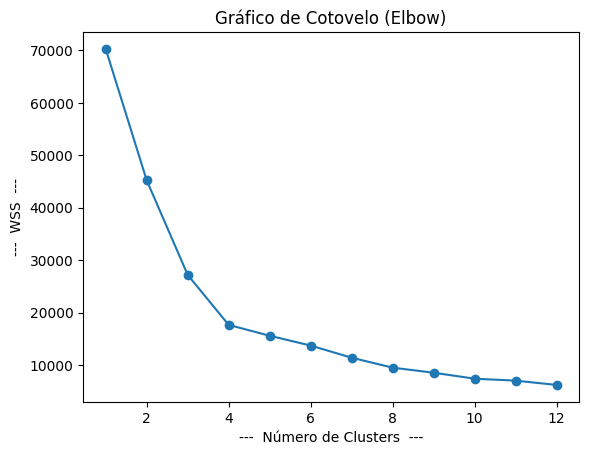

In [12]:
# Apresentar o gráfico de WSS x Número de Clusters
plt.plot(range(1, Kmax + 1), WSS, marker='o')
plt.xlabel("---  Número de Clusters  ---")
plt.ylabel("---  WSS  ---")
plt.title("Gráfico de Cotovelo (Elbow)")
plt.show()



In [13]:
#     >>>>>>>>>>>> EXECUÇÃO do K- MÉDIAS (K-MEANS) <<<<<<<<<<<<
# ---------- Agrupamento de Dados com k-Médias (K-Means) ----------
# Use para K o "melhor" valor obtido na análise do Grafico de Cotovelo
k = 4
# Mod_clusters = KMeans(n_clusters=k, random_state=0).fit(Dados.iloc[:, 2:4])
Mod_clusters = KMeans(n_clusters=k, random_state=0).fit(MeusDados)



In [14]:
# Mostra o Resultado da Clusterização
print(Mod_clusters)



KMeans(n_clusters=4, random_state=0)


In [15]:
# Mostra os resultados individuais
print("Clusters de cada ponto:\n", Mod_clusters.labels_)
print("Centroides dos Clusters:\n", Mod_clusters.cluster_centers_)
print("Soma Total dos Quadrados (TSS):\n", Mod_clusters.inertia_)
print("Iterações realizadas:\n", Mod_clusters.n_iter_)



Clusters de cada ponto:
 [2 1 2 1 0 2 2 3 3 1 3 3 0 2 2 2 2 2 3 3 1 0 0 0 0 0 0 1 1 1 1 3 1 1 1 1 3
 2 2 0 0 0 2 2 2 3 3 3 3 3 1 1 3 0 0 0 0 2 2 2 2 2 3 3 3 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 1 3 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2]
Centroides dos Clusters:
 [[51.5        18.8       ]
 [50.65384615 53.07692308]
 [20.28571429 21.88571429]
 [17.4        55.25      ]]
Soma Total dos Quadrados (TSS):
 17677.166483516485
Iterações realizadas:
 7


In [16]:
# EXPORTA Números dos CLUSTERS para o Data Frame com o Conjunto de Dados
# Cria novo campo na base de dados com o número do cluster
Dados['cluster'] = Mod_clusters.labels_
print(Dados.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   P        101 non-null    int64
 1   X        101 non-null    int64
 2   Y        101 non-null    int64
 3   W        101 non-null    int64
 4   cluster  101 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 3.7 KB
None


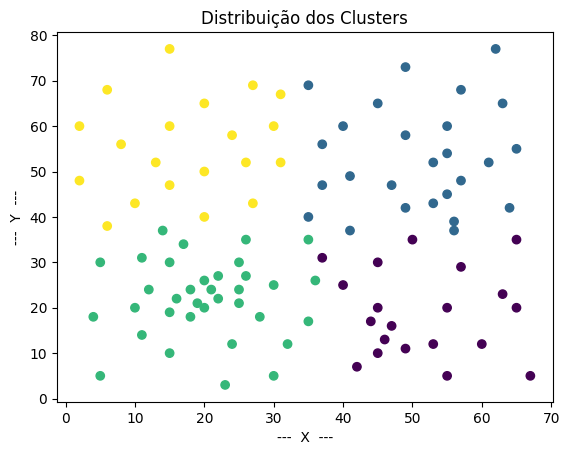

In [17]:
# Plota os Clusters com cores diferentes
plt.scatter(Dados.iloc[:, 1], Dados.iloc[:, 2], c=Dados['cluster'], cmap='viridis')
plt.xlabel("---  X  ---")
plt.ylabel("---  Y  ---")
plt.title("Distribuição dos Clusters")
plt.show()



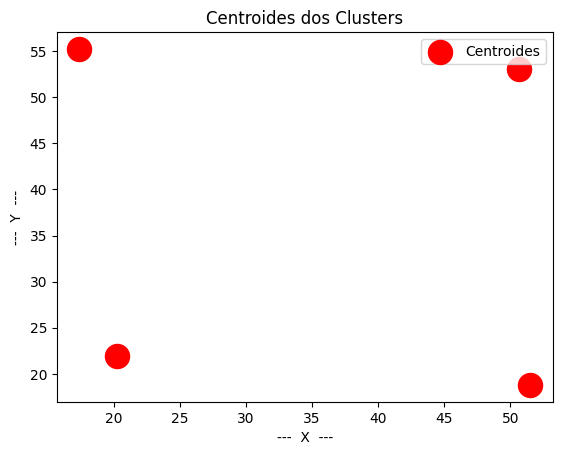

In [18]:
# Plota os Centroides
plt.scatter(Mod_clusters.cluster_centers_[:, 0], Mod_clusters.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.xlabel("---  X  ---")
plt.ylabel("---  Y  ---")
plt.title("Centroides dos Clusters")
plt.legend()
plt.show()



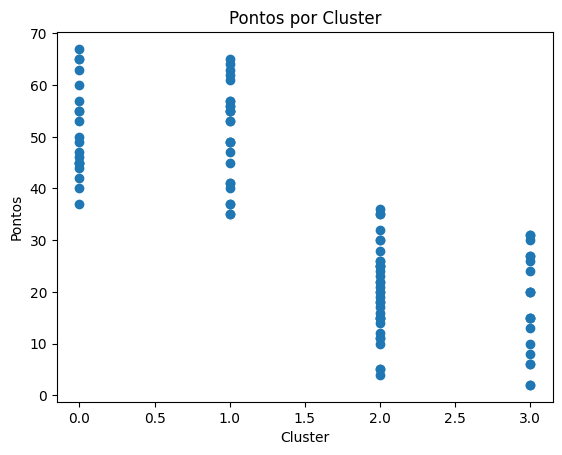

In [19]:
# Plota os Pontos de cada Cluster
plt.scatter(Mod_clusters.labels_, Dados.iloc[:, 1])
plt.xlabel("Cluster")
plt.ylabel("Pontos")
plt.title("Pontos por Cluster")
plt.show()